In [3]:
# Importing the required libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
df = pd.read_csv('E:\Project_95\Money_Laundering_Dataset _New.csv')
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1.0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,0.0,0.0
1,1.0,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,0.0,0.0
2,1.0,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.00,0.00,1.0,0.0
3,1.0,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.00,0.00,1.0,0.0
4,1.0,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
99995,10.0,PAYMENT,4020.66,C1410794718,NaN,155908.34,M1257036576,0.00,0.00,NaN,0.0
99996,10.0,PAYMENT,18345.49,C744303677,NaN,0.00,M1785344556,0.00,0.00,NaN,0.0
99997,10.0,CASH_IN,183774.91,C104331851,NaN,222947.91,C36392889,54925.05,0.00,NaN,0.0
99998,10.0,CASH_OUT,82237.17,C707662966,NaN,0.00,C1553004158,592635.66,799140.46,NaN,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            99323 non-null   float64
 1   type            100000 non-null  object 
 2   amount          100000 non-null  float64
 3   nameOrig        99990 non-null   object 
 4   oldbalanceOrg   99857 non-null   float64
 5   newbalanceOrig  99978 non-null   float64
 6   nameDest        99996 non-null   object 
 7   oldbalanceDest  99948 non-null   float64
 8   newbalanceDest  100000 non-null  float64
 9   isFraud         99683 non-null   float64
 10  isFlaggedFraud  99929 non-null   float64
dtypes: float64(8), object(3)
memory usage: 8.4+ MB


In [6]:
df.shape

(100000, 11)

In [7]:
print("Total number of data point :" ,df.shape[0])
print("Total number of columns :" ,df.shape[1])
print("Number of negative data poins(genuine) :",df[df["isFraud"] == 0].shape[0])
print("Number of positive data poins(fraud) :",df[df["isFraud"] == 1].shape[0])

Total number of data point : 100000
Total number of columns : 11
Number of negative data poins(genuine) : 99268
Number of positive data poins(fraud) : 415


In [8]:
# checking for null values in the given dataset
df.isna().sum()

step              677
type                0
amount              0
nameOrig           10
oldbalanceOrg     143
newbalanceOrig     22
nameDest            4
oldbalanceDest     52
newbalanceDest      0
isFraud           317
isFlaggedFraud     71
dtype: int64

In [9]:
from sklearn.impute import SimpleImputer

# Separate the columns with missing values
missing_cols = ['oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest']

imputer = SimpleImputer(strategy='median')

# Impute the missing values
df[missing_cols] = imputer.fit_transform(df[missing_cols])

In [10]:
from sklearn.impute import SimpleImputer

# Separate the columns with missing values
missing_col1 = ['step', 'nameOrig', 'nameDest','isFraud','isFlaggedFraud']

# Create a KNN imputer object
imputer = SimpleImputer(strategy='most_frequent')

# Impute the missing values
df[missing_col1] = imputer.fit_transform(df[missing_col1])

In [11]:
# checking after performing imputation on the dataset
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [12]:
df.duplicated().sum() # as we can see there are no duplicates in the dataset

0

In [13]:
df.transpose().duplicated().sum()

0

In [14]:
print("Total number of data point :" ,df.shape[0])
print("Total number of columns :" ,df.shape[1])
print("Number of negative data poins(genuine) :",df[df["isFraud"] == 0].shape[0])
print("Number of positive data poins(fraud) :",df[df["isFraud"] == 1].shape[0])

Total number of data point : 100000
Total number of columns : 11
Number of negative data poins(genuine) : 99585
Number of positive data poins(fraud) : 415


In [15]:
# First moment of business decision
# before doing first moment lets rename the columns 
df = df.rename(columns={'step': 'time', 'type': 'transaction_type'})

In [16]:
df # we have changed the names of the column 

,time,transaction_type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1.0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,0.0,0.0
1,1.0,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,0.0,0.0
2,1.0,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.00,0.00,1.0,0.0
3,1.0,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.00,0.00,1.0,0.0
4,1.0,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
99995,10.0,PAYMENT,4020.66,C1410794718,20100.0,155908.34,M1257036576,0.00,0.00,0.0,0.0
99996,10.0,PAYMENT,18345.49,C744303677,20100.0,0.00,M1785344556,0.00,0.00,0.0,0.0
99997,10.0,CASH_IN,183774.91,C104331851,20100.0,222947.91,C36392889,54925.05,0.00,0.0,0.0
99998,10.0,CASH_OUT,82237.17,C707662966,20100.0,0.00,C1553004158,592635.66,799140.46,0.0,0.0


In [17]:
df.time  = df.time.astype('int64') # we are doing this as it indicate time
df.isFraud  = df.isFraud.astype('int64') # we consider it as an categorical data 
print(df.dtypes)

time                  int64
transaction_type     object
amount              float64
nameOrig             object
oldbalanceOrg       float64
newbalanceOrig      float64
nameDest             object
oldbalanceDest      float64
newbalanceDest      float64
isFraud               int64
isFlaggedFraud       object
dtype: object


In [18]:
pd.crosstab(df['transaction_type'] , df['isFraud']) # checking which transacton type has more genuine and fraud transaction

isFraud,0,1
transaction_type,,
CASH_IN,20180,5
CASH_OUT,30553,165
DEBIT,977,11
PAYMENT,39367,145
TRANSFER,8508,89


In [19]:
# we are considering the amount column to calculate 'first moment of business decision'
df['amount'].mean() # from mean value we can observe that the average transaction done in the given time peroid is "173602.22"

173602.2217641003

In [20]:
df['newbalanceOrig'].mean() # from mean value we can observe that the average account balance maintained by the customer in the given time peroid is "894061.91"

894061.916887197

In [21]:
df['amount'].mode() # from mode value we can say that the most frequent transaction amount is 2475

0     2475.13
1     6285.19
2    17320.91
3    25975.86
4    29707.86
5    89631.24
Name: amount, dtype: float64

In [22]:

df['amount'].var()

118542710414.3486

In [23]:
df['amount'].std() 

344300.3200903952

In [24]:
df['amount'].skew()

5.428317054388887

In [25]:
df['oldbalanceOrg'].skew()

4.958011018655087

In [26]:
df['newbalanceOrig'].skew()

4.889491852425344

In [27]:
df['oldbalanceDest'].skew()

5.058239113292946

In [28]:
df['newbalanceDest'].skew()

4.319535198114206

In [29]:
df['amount'].kurt()

48.099032542272205

In [30]:
df['oldbalanceOrg'].kurt()

31.579922448346124

In [31]:
df['newbalanceOrig'].kurt()

30.70918427042819

In [32]:
df['oldbalanceDest'].kurt()

32.49320051675001

In [33]:
df['newbalanceDest'].kurt()

23.915283125250816

<AxesSubplot:>

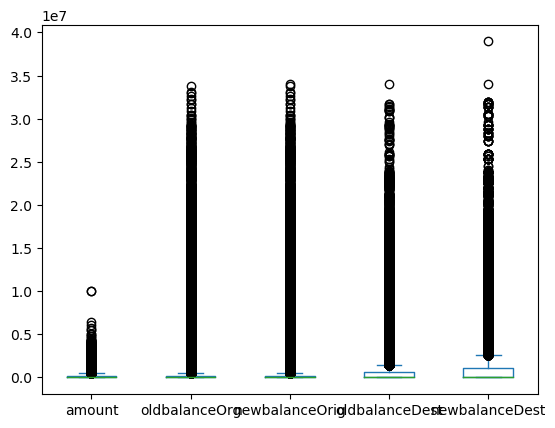

In [34]:
# creating box plot to check outliers
df[['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']].plot(kind='box')

array([[<AxesSubplot:title={'center':'time'}>,
        <AxesSubplot:title={'center':'amount'}>,
        <AxesSubplot:title={'center':'oldbalanceOrg'}>],
       [<AxesSubplot:title={'center':'newbalanceOrig'}>,
        <AxesSubplot:title={'center':'oldbalanceDest'}>,
        <AxesSubplot:title={'center':'newbalanceDest'}>],
       [<AxesSubplot:title={'center':'isFraud'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

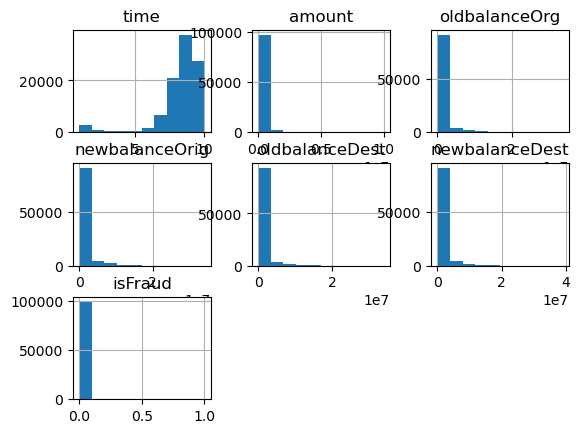

In [35]:
df.hist()

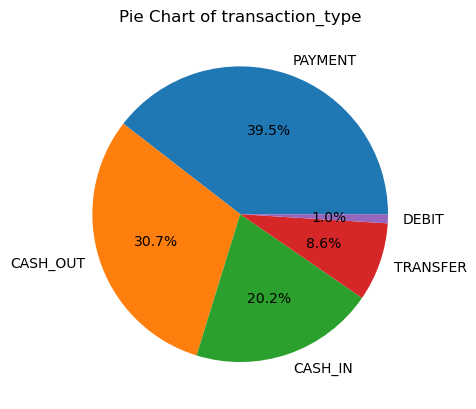

In [36]:
import matplotlib.pyplot as plt
features_object = ['transaction_type']
for column_name in features_object:
    column_data = df[column_name]
    value_counts = column_data.value_counts()
    plt.pie(value_counts.values, labels=value_counts.index, autopct='%1.1f%%')
    plt.title(f'Pie Chart of {column_name}')
    plt.show()

In [37]:
df.groupby('transaction_type')['isFraud'].sum()

transaction_type
CASH_IN       5
CASH_OUT    165
DEBIT        11
PAYMENT     145
TRANSFER     89
Name: isFraud, dtype: int64

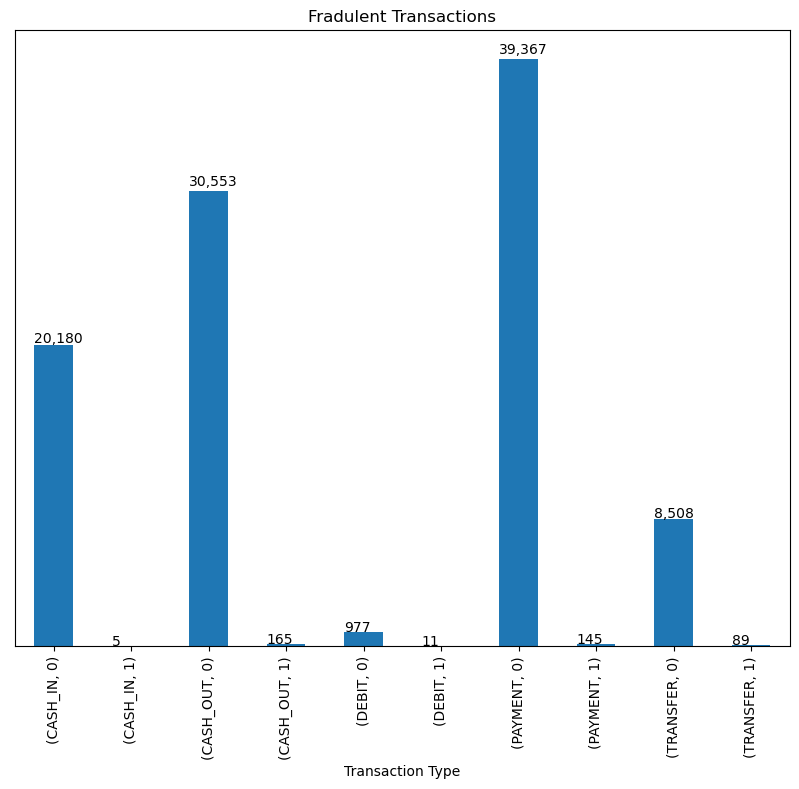

In [38]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
ax = df.groupby(['transaction_type','isFraud']).size().plot(kind='bar')

for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.01))
plt.title("Fradulent Transactions")
plt.xlabel("Transaction Type")
plt.yticks([])
#plt.xticks([' Valid CashOut','Fraud CashOut','Valid Transfer','Fraud Transfer'])
plt.xticks(rotation=90)
plt.show()

In [39]:
# Feature enginering 
print("Are there any mismatch in the balance at origin and destination after transaction?")
df['error_orig'] = (df["oldbalanceOrg"] - df["amount"] != df["newbalanceOrig"]).astype(int)
df['error_dest'] = (df["oldbalanceDest"] + df["amount"] != df["newbalanceDest"]).astype(int)

print("Balance Error(%) at the Sender:",round(df['error_orig'].value_counts()[1]/df.shape[0] * 100,2))
print("Balance Error(%) at the Receiver:",round(df['error_dest'].value_counts()[1]/df.shape[0] * 100,2))

#print("Valid Balance(%) at the origin:",round(data['error_orig'].value_counts()[0]/data.shape[0] * 100,2))
#print("Valid Balance(%) at the dest:",round(data['error_dest'].value_counts()[0]/data.shape[0] * 100,2))

Are there any mismatch in the balance at origin and destination after transaction?
Balance Error(%) at the Sender: 98.4
Balance Error(%) at the Receiver: 92.73


In [40]:
df['newbalanceSender']= df['oldbalanceOrg'] - df['amount'].astype(float)
df['newbalanceReceiver'] = df['oldbalanceDest'] + df['amount'].astype(float)

In [41]:
df

,time,transaction_type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,error_orig,error_dest,newbalanceSender,newbalanceReceiver
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,0,0.0,0,1,160296.36,9839.64
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,0,0.0,0,1,19384.72,1864.28
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.00,0.00,1,0.0,0,1,0.00,181.00
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.00,0.00,1,0.0,0,1,0.00,21363.00
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,0,0.0,0,1,29885.86,11668.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,10,PAYMENT,4020.66,C1410794718,20100.0,155908.34,M1257036576,0.00,0.00,0,0.0,1,1,16079.34,4020.66
99996,10,PAYMENT,18345.49,C744303677,20100.0,0.00,M1785344556,0.00,0.00,0,0.0,1,1,1754.51,18345.49
99997,10,CASH_IN,183774.91,C104331851,20100.0,222947.91,C36392889,54925.05,0.00,0,0.0,1,1,-163674.91,238699.96
99998,10,CASH_OUT,82237.17,C707662966,20100.0,0.00,C1553004158,592635.66,799140.46,0,0.0,1,1,-62137.17,674872.83


In [42]:
# replace negative integers with zero using a lambda function

df['newbalanceSender'] = df['newbalanceSender'].apply(lambda x: 0 if x < 0 else x)

# print the updated DataFrame
print(df)

       time transaction_type     amount     nameOrig  oldbalanceOrg  \
0         1          PAYMENT    9839.64  C1231006815       170136.0   
1         1          PAYMENT    1864.28  C1666544295        21249.0   
2         1         TRANSFER     181.00  C1305486145          181.0   
3         1         CASH_OUT     181.00   C840083671          181.0   
4         1          PAYMENT   11668.14  C2048537720        41554.0   
...     ...              ...        ...          ...            ...   
99995    10          PAYMENT    4020.66  C1410794718        20100.0   
99996    10          PAYMENT   18345.49   C744303677        20100.0   
99997    10          CASH_IN  183774.91   C104331851        20100.0   
99998    10         CASH_OUT   82237.17   C707662966        20100.0   
99999    10          PAYMENT   20096.56  C1868032458        20100.0   

       newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
0           160296.36  M1979787155            0.00            0.00  

In [43]:
# Rechecking for balance error.
print("Are there any mismatch in the balance at origin and destination after transaction?")
df['error_orig'] = (df["oldbalanceOrg"] - df["amount"] <= df["newbalanceSender"]).astype(int)
df['error_dest'] = (df["oldbalanceDest"] + df["amount"] != df["newbalanceReceiver"]).astype(int)

print("Balance Error(%) at the Sender:",round(df['error_orig'].value_counts()/df.shape[0] * 100,2))
print("Balance Error(%) at the Receiver:",round(df['error_dest'].value_counts()/df.shape[0] * 100,2))

#print("Valid Balance(%) at the origin:",round(data['error_orig'].value_counts()[0]/data.shape[0] * 100,2))
#print("Valid Balance(%) at the dest:",round(data['error_dest'].value_counts()[0]/data.shape[0] * 100,2))

Are there any mismatch in the balance at origin and destination after transaction?
Balance Error(%) at the Sender: 1    100.0
Name: error_orig, dtype: float64
Balance Error(%) at the Receiver: 0    100.0
Name: error_dest, dtype: float64


In [44]:
df = df.drop(['error_orig','error_dest'],axis = 1)

In [45]:
df

,time,transaction_type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,newbalanceSender,newbalanceReceiver
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,0,0.0,160296.36,9839.64
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,0,0.0,19384.72,1864.28
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.00,0.00,1,0.0,0.00,181.00
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.00,0.00,1,0.0,0.00,21363.00
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,0,0.0,29885.86,11668.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,10,PAYMENT,4020.66,C1410794718,20100.0,155908.34,M1257036576,0.00,0.00,0,0.0,16079.34,4020.66
99996,10,PAYMENT,18345.49,C744303677,20100.0,0.00,M1785344556,0.00,0.00,0,0.0,1754.51,18345.49
99997,10,CASH_IN,183774.91,C104331851,20100.0,222947.91,C36392889,54925.05,0.00,0,0.0,0.00,238699.96
99998,10,CASH_OUT,82237.17,C707662966,20100.0,0.00,C1553004158,592635.66,799140.46,0,0.0,0.00,674872.83


In [46]:
df['time'] = pd.to_datetime("01/01/2022") + pd.to_timedelta(df['time'], unit='h')
df['time'].sample(10)

59417   2022-01-01 09:00:00
41709   2022-01-01 09:00:00
45360   2022-01-01 09:00:00
84711   2022-01-01 10:00:00
20312   2022-01-01 08:00:00
52788   2022-01-01 09:00:00
76299   2022-01-01 10:00:00
29682   2022-01-01 08:00:00
45671   2022-01-01 09:00:00
341     2022-01-01 01:00:00
Name: time, dtype: datetime64[ns]

In [47]:
# create new column to get morning, afternoon, evening, or night
df['time'] = pd.cut(df['time'].dt.hour,
                        bins=[0, 6, 12, 18, 24], 
                        labels = ['night','morning','afternoon','evening'],
                        include_lowest = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   time                100000 non-null  category
 1   transaction_type    100000 non-null  object  
 2   amount              100000 non-null  float64 
 3   nameOrig            100000 non-null  object  
 4   oldbalanceOrg       100000 non-null  float64 
 5   newbalanceOrig      100000 non-null  float64 
 6   nameDest            100000 non-null  object  
 7   oldbalanceDest      100000 non-null  float64 
 8   newbalanceDest      100000 non-null  float64 
 9   isFraud             100000 non-null  int64   
 10  isFlaggedFraud      100000 non-null  object  
 11  newbalanceSender    100000 non-null  float64 
 12  newbalanceReceiver  100000 non-null  float64 
dtypes: category(1), float64(7), int64(1), object(4)
memory usage: 9.3+ MB


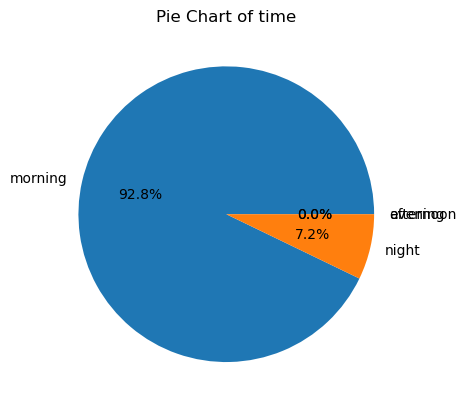

In [48]:
features_object = ['time']
for column_name in features_object:
    column_data = df[column_name]
    value_counts = column_data.value_counts()
    plt.pie(value_counts.values, labels=value_counts.index, autopct='%1.1f%%')
    plt.title(f'Pie Chart of {column_name}')
    ax.legend(column_data, loc="best")
    plt.show()

[Text(0, 0, '92836'), Text(0, 0, '7164'), Text(0, 0, ''), Text(0, 0, '')]

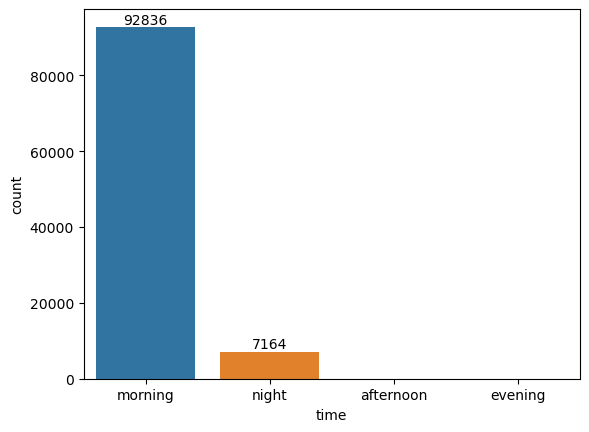

In [49]:
ax = sns.countplot(x = df['time'],
                   order = df['time'].value_counts (ascending=False).index);
abs_values = df['time'].value_counts (ascending = False).values 
                          
ax.bar_label (container=ax.containers[0], labels=abs_values)

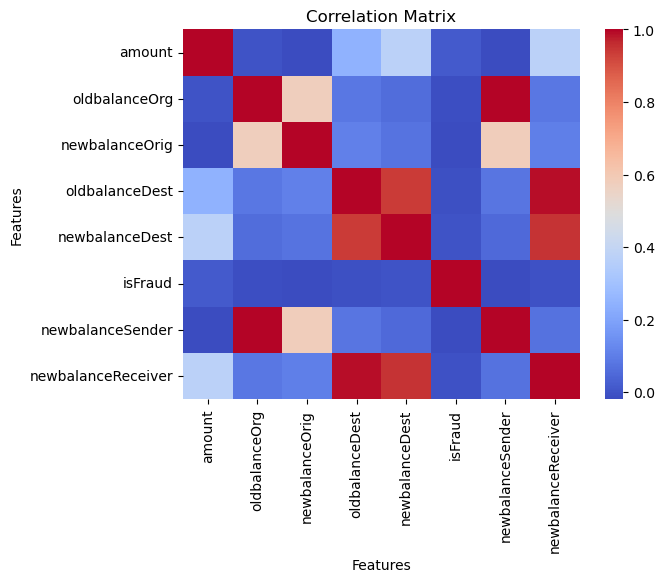

In [50]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Create a heatmap using Seaborn
sns.heatmap(corr_matrix, cmap='coolwarm')

# Add title and axis labels
plt.title('Correlation Matrix')
plt.xlabel('Features')
plt.ylabel('Features')

# Show the plot
plt.show()

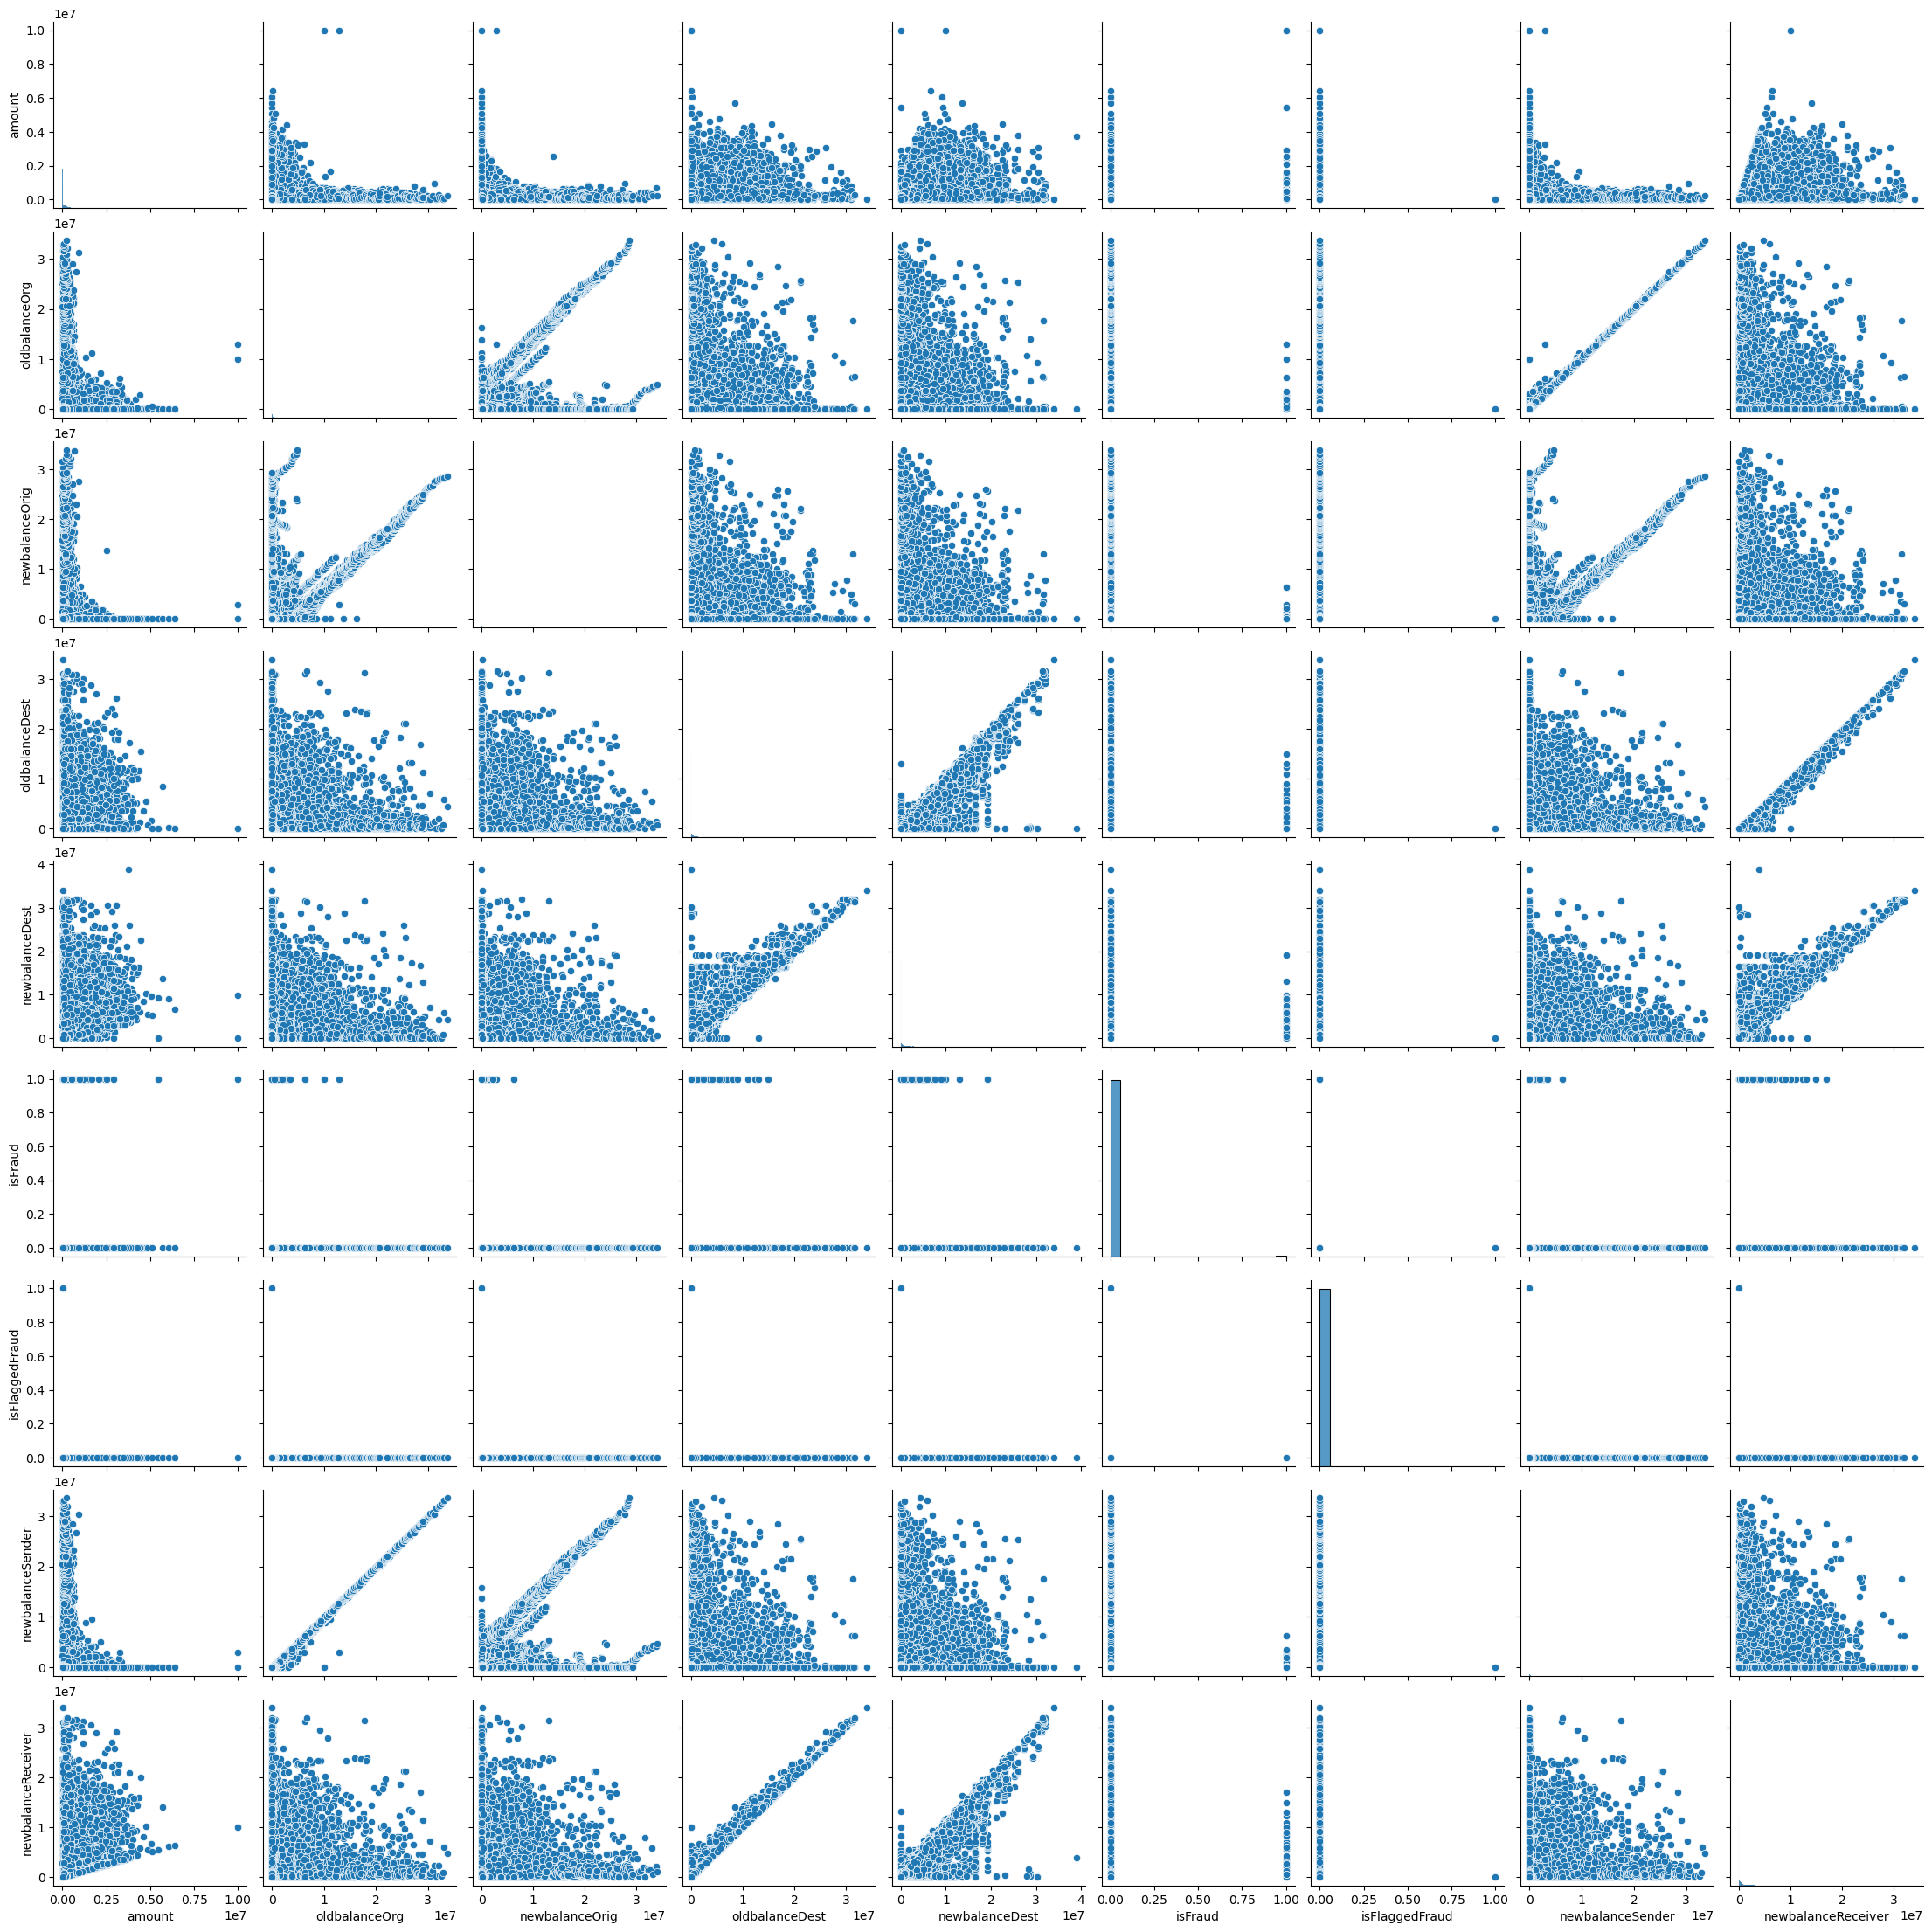

In [51]:
sns.pairplot(df)

In [52]:
df.columns

Index(['time', 'transaction_type', 'amount', 'nameOrig', 'oldbalanceOrg',
       'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest',
       'isFraud', 'isFlaggedFraud', 'newbalanceSender', 'newbalanceReceiver'],
      dtype='object')

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   time                100000 non-null  category
 1   transaction_type    100000 non-null  object  
 2   amount              100000 non-null  float64 
 3   nameOrig            100000 non-null  object  
 4   oldbalanceOrg       100000 non-null  float64 
 5   newbalanceOrig      100000 non-null  float64 
 6   nameDest            100000 non-null  object  
 7   oldbalanceDest      100000 non-null  float64 
 8   newbalanceDest      100000 non-null  float64 
 9   isFraud             100000 non-null  int64   
 10  isFlaggedFraud      100000 non-null  object  
 11  newbalanceSender    100000 non-null  float64 
 12  newbalanceReceiver  100000 non-null  float64 
dtypes: category(1), float64(7), int64(1), object(4)
memory usage: 9.3+ MB


In [54]:
# Using drop function and removing unwanted column 
df = df.drop(['nameOrig','newbalanceOrig','nameDest','newbalanceDest','isFlaggedFraud'], axis=1)
df

,time,transaction_type,amount,oldbalanceOrg,oldbalanceDest,isFraud,newbalanceSender,newbalanceReceiver
0,night,PAYMENT,9839.64,170136.0,0.00,0,160296.36,9839.64
1,night,PAYMENT,1864.28,21249.0,0.00,0,19384.72,1864.28
2,night,TRANSFER,181.00,181.0,0.00,1,0.00,181.00
3,night,CASH_OUT,181.00,181.0,21182.00,1,0.00,21363.00
4,night,PAYMENT,11668.14,41554.0,0.00,0,29885.86,11668.14
...,...,...,...,...,...,...,...,...
99995,morning,PAYMENT,4020.66,20100.0,0.00,0,16079.34,4020.66
99996,morning,PAYMENT,18345.49,20100.0,0.00,0,1754.51,18345.49
99997,morning,CASH_IN,183774.91,20100.0,54925.05,0,0.00,238699.96
99998,morning,CASH_OUT,82237.17,20100.0,592635.66,0,0.00,674872.83


In [55]:
df = df.rename(columns={'newbalanceSender': 'newbalanceOrg', 'newbalanceReceiver': 'newbalanceDest'})
df = df[['time','transaction_type','amount','oldbalanceOrg','newbalanceOrg','oldbalanceDest','newbalanceDest','isFraud']]
df

,time,transaction_type,amount,oldbalanceOrg,newbalanceOrg,oldbalanceDest,newbalanceDest,isFraud
0,night,PAYMENT,9839.64,170136.0,160296.36,0.00,9839.64,0
1,night,PAYMENT,1864.28,21249.0,19384.72,0.00,1864.28,0
2,night,TRANSFER,181.00,181.0,0.00,0.00,181.00,1
3,night,CASH_OUT,181.00,181.0,0.00,21182.00,21363.00,1
4,night,PAYMENT,11668.14,41554.0,29885.86,0.00,11668.14,0
...,...,...,...,...,...,...,...,...
99995,morning,PAYMENT,4020.66,20100.0,16079.34,0.00,4020.66,0
99996,morning,PAYMENT,18345.49,20100.0,1754.51,0.00,18345.49,0
99997,morning,CASH_IN,183774.91,20100.0,0.00,54925.05,238699.96,0
99998,morning,CASH_OUT,82237.17,20100.0,0.00,592635.66,674872.83,0


In [56]:
df1 = df.drop(['time'],axis = 1)

In [57]:
df1

,transaction_type,amount,oldbalanceOrg,newbalanceOrg,oldbalanceDest,newbalanceDest,isFraud
0,PAYMENT,9839.64,170136.0,160296.36,0.00,9839.64,0
1,PAYMENT,1864.28,21249.0,19384.72,0.00,1864.28,0
2,TRANSFER,181.00,181.0,0.00,0.00,181.00,1
3,CASH_OUT,181.00,181.0,0.00,21182.00,21363.00,1
4,PAYMENT,11668.14,41554.0,29885.86,0.00,11668.14,0
...,...,...,...,...,...,...,...
99995,PAYMENT,4020.66,20100.0,16079.34,0.00,4020.66,0
99996,PAYMENT,18345.49,20100.0,1754.51,0.00,18345.49,0
99997,CASH_IN,183774.91,20100.0,0.00,54925.05,238699.96,0
99998,CASH_OUT,82237.17,20100.0,0.00,592635.66,674872.83,0


In [58]:
# performing one hot encoding for the following categorical column in the data set 

In [59]:
# Perform one-hot encoding on a categorical column
one_hot_encoded = pd.get_dummies(df1['transaction_type'])

# Concatenate the one-hot encoded columns to the original dataset
df1 = pd.concat([df1, one_hot_encoded], axis=1)

# Drop the original categorical column from the dataset
df1 = df1.drop('transaction_type', axis=1)

In [60]:
df1

,amount,oldbalanceOrg,newbalanceOrg,oldbalanceDest,newbalanceDest,isFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,9839.64,170136.0,160296.36,0.00,9839.64,0,0,0,0,1,0
1,1864.28,21249.0,19384.72,0.00,1864.28,0,0,0,0,1,0
2,181.00,181.0,0.00,0.00,181.00,1,0,0,0,0,1
3,181.00,181.0,0.00,21182.00,21363.00,1,0,1,0,0,0
4,11668.14,41554.0,29885.86,0.00,11668.14,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
99995,4020.66,20100.0,16079.34,0.00,4020.66,0,0,0,0,1,0
99996,18345.49,20100.0,1754.51,0.00,18345.49,0,0,0,0,1,0
99997,183774.91,20100.0,0.00,54925.05,238699.96,0,1,0,0,0,0
99998,82237.17,20100.0,0.00,592635.66,674872.83,0,0,1,0,0,0


In [61]:
df1 = df1[['amount','oldbalanceOrg','newbalanceOrg','oldbalanceDest','newbalanceDest','CASH_IN','CASH_OUT','DEBIT','PAYMENT','TRANSFER','isFraud']]
df1

,amount,oldbalanceOrg,newbalanceOrg,oldbalanceDest,newbalanceDest,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,isFraud
0,9839.64,170136.0,160296.36,0.00,9839.64,0,0,0,1,0,0
1,1864.28,21249.0,19384.72,0.00,1864.28,0,0,0,1,0,0
2,181.00,181.0,0.00,0.00,181.00,0,0,0,0,1,1
3,181.00,181.0,0.00,21182.00,21363.00,0,1,0,0,0,1
4,11668.14,41554.0,29885.86,0.00,11668.14,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
99995,4020.66,20100.0,16079.34,0.00,4020.66,0,0,0,1,0,0
99996,18345.49,20100.0,1754.51,0.00,18345.49,0,0,0,1,0,0
99997,183774.91,20100.0,0.00,54925.05,238699.96,1,0,0,0,0,0
99998,82237.17,20100.0,0.00,592635.66,674872.83,0,1,0,0,0,0


In [62]:
from sklearn.preprocessing import MinMaxScaler

# select the columns to normalize
cols_to_normalize = ['amount','oldbalanceOrg','newbalanceOrg','oldbalanceDest','newbalanceDest']

# create an instance of the MinMaxScaler class
scaler = MinMaxScaler()

# fit the scaler to the selected columns and transform the data
df1[cols_to_normalize] = scaler.fit_transform(df1[cols_to_normalize])

# display the first few rows of the normalized data
print(df1.head())

     amount  oldbalanceOrg  newbalanceOrg  oldbalanceDest  newbalanceDest  \
0  0.000984       0.005034       0.004775        0.000000        0.000289   
1  0.000186       0.000629       0.000577        0.000000        0.000055   
2  0.000018       0.000005       0.000000        0.000000        0.000005   
3  0.000018       0.000005       0.000000        0.000623        0.000627   
4  0.001167       0.001230       0.000890        0.000000        0.000343   

   CASH_IN  CASH_OUT  DEBIT  PAYMENT  TRANSFER  isFraud  
0        0         0      0        1         0        0  
1        0         0      0        1         0        0  
2        0         0      0        0         1        1  
3        0         1      0        0         0        1  
4        0         0      0        1         0        0  


In [63]:
df1

,amount,oldbalanceOrg,newbalanceOrg,oldbalanceDest,newbalanceDest,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,isFraud
0,0.000984,0.005034,4.774712e-03,0.000000,0.000289,0,0,0,1,0,0
1,0.000186,0.000629,5.774083e-04,0.000000,0.000055,0,0,0,1,0,0
2,0.000018,0.000005,0.000000e+00,0.000000,0.000005,0,0,0,0,1,1
3,0.000018,0.000005,0.000000e+00,0.000623,0.000627,0,1,0,0,0,1
4,0.001167,0.001230,8.902034e-04,0.000000,0.000343,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
99995,0.000402,0.000595,4.789517e-04,0.000000,0.000118,0,0,0,1,0,0
99996,0.001835,0.000595,5.226119e-05,0.000000,0.000539,0,0,0,1,0,0
99997,0.018377,0.000595,0.000000e+00,0.001615,0.007011,1,0,0,0,0,0
99998,0.008224,0.000595,0.000000e+00,0.017426,0.019823,0,1,0,0,0,0


In [64]:
# Define X (features) and y (target)
X = df1.drop(['isFraud'],axis = 1)
y =df1.isFraud

In [65]:
from imblearn.over_sampling import SMOTE

# Instantiate SMOTE object
smote = SMOTE(random_state=42)

# Resample data using SMOTE
X_resampled, y_resampled = smote.fit_resample(X, y)

# Combine resampled data into DataFrame
balanced_df = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled)], axis=1)

In [66]:
balanced_df

,amount,oldbalanceOrg,newbalanceOrg,oldbalanceDest,newbalanceDest,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,isFraud
0,0.000984,0.005034,0.004775,0.000000,0.000289,0,0,0,1,0,0
1,0.000186,0.000629,0.000577,0.000000,0.000055,0,0,0,1,0,0
2,0.000018,0.000005,0.000000,0.000000,0.000005,0,0,0,0,1,1
3,0.000018,0.000005,0.000000,0.000623,0.000627,0,1,0,0,0,1
4,0.001167,0.001230,0.000890,0.000000,0.000343,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
199165,0.003591,0.000063,0.000000,0.001346,0.002400,0,1,0,0,0,1
199166,0.000430,0.003405,0.003348,0.036340,0.036427,0,0,1,0,0,1
199167,0.168870,0.012539,0.000000,0.041568,0.091125,0,0,0,0,1,1
199168,0.000794,0.000271,0.000036,0.000000,0.000233,0,0,0,1,0,1


In [67]:
X = X_resampled
X

,amount,oldbalanceOrg,newbalanceOrg,oldbalanceDest,newbalanceDest,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,0.000984,0.005034,0.004775,0.000000,0.000289,0,0,0,1,0
1,0.000186,0.000629,0.000577,0.000000,0.000055,0,0,0,1,0
2,0.000018,0.000005,0.000000,0.000000,0.000005,0,0,0,0,1
3,0.000018,0.000005,0.000000,0.000623,0.000627,0,1,0,0,0
4,0.001167,0.001230,0.000890,0.000000,0.000343,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
199165,0.003591,0.000063,0.000000,0.001346,0.002400,0,1,0,0,0
199166,0.000430,0.003405,0.003348,0.036340,0.036427,0,0,1,0,0
199167,0.168870,0.012539,0.000000,0.041568,0.091125,0,0,0,0,1
199168,0.000794,0.000271,0.000036,0.000000,0.000233,0,0,0,1,0


In [ ]:
y = y_resampled
y

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

# Define the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('scaler', MinMaxScaler(), slice(1, None))
    ])

# Define the pipeline
pipeline = make_pipeline(
    preprocessor,
    SMOTE(random_state=42),
    xgb.XGBClassifier()
)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)
# Create a Logistic Regression classifier
logreg_clf = LogisticRegression(random_state=42)

# Train the classifier on the training data
logreg_clf.fit(X_train, y_train)

# Predict the labels of the training and test data
train_pred = logreg_clf.predict(X_train)
test_pred = logreg_clf.predict(X_test)

# Calculate the performance metrics for the training data
train_accuracy = accuracy_score(y_train, train_pred)
train_f1 = f1_score(y_train, train_pred, average='weighted')
train_recall = recall_score(y_train, train_pred, average='weighted')
train_precision = precision_score(y_train, train_pred, average='weighted')

# Calculate the performance metrics for the test data
test_accuracy = accuracy_score(y_test, test_pred)
test_f1 = f1_score(y_test, test_pred, average='weighted')
test_recall = recall_score(y_test, test_pred, average='weighted')
test_precision = precision_score(y_test, test_pred, average='weighted')

# Print the performance metrics
print('Training Accuracy: {:.3f}'.format(train_accuracy))
print('Training F1 Score: {:.3f}'.format(train_f1))
print('Training Recall Score: {:.3f}'.format(train_recall))
print('Training Precision Score: {:.3f}'.format(train_precision))

print('Test Accuracy: {:.3f}'.format(test_accuracy))
print('Test F1 Score: {:.3f}'.format(test_f1))
print('Test Recall Score: {:.3f}'.format(test_recall))
print('Test Precision Score: {:.3f}'.format(test_precision))

In [ ]:
## 2. Decision Tree with out grid search 

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

# Define the model
model = DecisionTreeClassifier(random_state=42, max_depth=3)

# Train the model
model.fit(X_train, y_train)

# Predict the labels of the training and test data
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

# Calculate the performance metrics for the training data
train_accuracy = accuracy_score(y_train, train_pred)
train_f1 = f1_score(y_train, train_pred)
train_recall = recall_score(y_train, train_pred)
train_precision = precision_score(y_train, train_pred)

# Calculate the performance metrics for the test data
test_accuracy = accuracy_score(y_test, test_pred)
test_f1 = f1_score(y_test, test_pred)
test_recall = recall_score(y_test, test_pred)
test_precision = precision_score(y_test, test_pred)

# Print the performance metrics
print('Training Accuracy: {:.3f}'.format(train_accuracy))
print('Training F1 Score: {:.3f}'.format(train_f1))
print('Training Recall Score: {:.3f}'.format(train_recall))
print('Training Precision Score: {:.3f}'.format(train_precision))

print('Test Accuracy: {:.3f}'.format(test_accuracy))
print('Test F1 Score: {:.3f}'.format(test_f1))
print('Test Recall Score: {:.3f}'.format(test_recall))
print('Test Precision Score: {:.3f}'.format(test_precision))

In [ ]:
## 3 Random forest with out grid search

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

# Define the model
model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=5)

# Train the model
model.fit(X_train, y_train)

# Predict the labels of the training and test data
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

# Calculate the performance metrics for the training data
train_accuracy = accuracy_score(y_train, train_pred)
train_f1 = f1_score(y_train, train_pred)
train_recall = recall_score(y_train, train_pred)
train_precision = precision_score(y_train, train_pred)

# Calculate the performance metrics for the test data
test_accuracy = accuracy_score(y_test, test_pred)
test_f1 = f1_score(y_test, test_pred)
test_recall = recall_score(y_test, test_pred)
test_precision = precision_score(y_test, test_pred)

# Print the performance metrics
print('Training Accuracy: {:.3f}'.format(train_accuracy))
print('Training F1 Score: {:.3f}'.format(train_f1))
print('Training Recall Score: {:.3f}'.format(train_recall))
print('Training Precision Score: {:.3f}'.format(train_precision))

print('Test Accuracy: {:.3f}'.format(test_accuracy))
print('Test F1 Score: {:.3f}'.format(test_f1))
print('Test Recall Score: {:.3f}'.format(test_recall))
print('Test Precision Score: {:.3f}'.format(test_precision))


In [ ]:
## 4.Naive Bayes with out grid search

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

model = GaussianNB()

# Train the model
model.fit(X_train, y_train)

# Predict the labels of the training and test data
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

# Calculate the performance metrics for the training data
train_accuracy = accuracy_score(y_train, train_pred)
train_f1 = f1_score(y_train, train_pred)
train_recall = recall_score(y_train, train_pred)
train_precision = precision_score(y_train, train_pred)

# Calculate the performance metrics for the test data
test_accuracy = accuracy_score(y_test, test_pred)
test_f1 = f1_score(y_test, test_pred)
test_recall = recall_score(y_test, test_pred)
test_precision = precision_score(y_test, test_pred)

# Print the performance metrics
print('Training Accuracy: {:.3f}'.format(train_accuracy))
print('Training F1 Score: {:.3f}'.format(train_f1))
print('Training Recall Score: {:.3f}'.format(train_recall))
print('Training Precision Score: {:.3f}'.format(train_precision))

print('Test Accuracy: {:.3f}'.format(test_accuracy))
print('Test F1 Score: {:.3f}'.format(test_f1))
print('Test Recall Score: {:.3f}'.format(test_recall))
print('Test Precision Score: {:.3f}'.format(test_precision))


In [ ]:
## NAIYE BAYES with grid search

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.model_selection import GridSearchCV
    
# Define the model
model = GaussianNB()

# Set the hyperparameters to tune
param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]}

# Define the grid search
grid = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid.fit(X_train, y_train)

# Extract the best model from the grid search
best_model = grid.best_estimator_

# Predict the labels of the training and test data using the best model
train_pred = best_model.predict(X_train)
test_pred = best_model.predict(X_test)

# Calculate the performance metrics for the training data
train_accuracy = accuracy_score(y_train, train_pred)
train_f1 = f1_score(y_train, train_pred)
train_recall = recall_score(y_train, train_pred)
train_precision = precision_score(y_train, train_pred)

# Calculate the performance metrics for the test data
test_accuracy = accuracy_score(y_test, test_pred)
test_f1 = f1_score(y_test, test_pred)
test_recall = recall_score(y_test, test_pred)
test_precision = precision_score(y_test, test_pred)

# Print the performance metrics
print('Training Accuracy: {:.3f}'.format(train_accuracy))
print('Training F1 Score: {:.3f}'.format(train_f1))
print('Training Recall Score: {:.3f}'.format(train_recall))
print('Training Precision Score: {:.3f}'.format(train_precision))

print('Test Accuracy: {:.3f}'.format(test_accuracy))
print('Test F1 Score: {:.3f}'.format(test_f1))
print('Test Recall Score: {:.3f}'.format(test_recall))
print('Test Precision Score: {:.3f}'.format(test_precision))

In [ ]:
## 5. Xtreme Gradient Boosting with out grid search

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

# Define the model
model = XGBClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict the labels of the training and test data
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

 # Calculate the performance metrics for the training data
train_accuracy = accuracy_score(y_train, train_pred)
train_f1 = f1_score(y_train, train_pred)
train_recall = recall_score(y_train, train_pred)
train_precision = precision_score(y_train, train_pred)

# Calculate the performance metrics for the test data
test_accuracy = accuracy_score(y_test, test_pred)
test_f1 = f1_score(y_test, test_pred)
test_recall = recall_score(y_test, test_pred)
test_precision = precision_score(y_test, test_pred)

# Print the performance metrics
print('Training Accuracy: {:.3f}'.format(train_accuracy))
print('Training F1 Score: {:.3f}'.format(train_f1))
print('Training Recall Score: {:.3f}'.format(train_recall))
print('Training Precision Score: {:.3f}'.format(train_precision))

print('Test Accuracy: {:.3f}'.format(test_accuracy))
print('Test F1 Score: {:.3f}'.format(test_f1))
print('Test Recall Score: {:.3f}'.format(test_recall))
print('Test Precision Score: {:.3f}'.format(test_precision))


In [ ]:
# XTREME GRADIENT BOOSTING with grid search

from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

# Define the XGBoost model
xgb_model = XGBClassifier()

# Define the hyperparameters to be tuned using GridSearchCV
param_grid = {'n_estimators': [50, 100, 150],
              'max_depth': [3, 4, 5],
              'learning_rate': [0.1, 0.2, 0.3]}

# Create the GridSearchCV object
grid = GridSearchCV(xgb_model, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid.fit(X_train, y_train)

# Extract the best model from the grid search
best_model = grid.best_estimator_


# Use the best model to predict labels on the training and test data
train_pred = best_model.predict(X_train)
test_pred = best_model.predict(X_test)

# Calculate the performance metrics for the training data
train_accuracy = accuracy_score(y_train, train_pred)
train_f1 = f1_score(y_train, train_pred)
train_recall = recall_score(y_train, train_pred)
train_precision = precision_score(y_train, train_pred)

# Calculate the performance metrics for the test data
test_accuracy = accuracy_score(y_test, test_pred)
test_f1 = f1_score(y_test, test_pred)
test_recall = recall_score(y_test, test_pred)
test_precision = precision_score(y_test, test_pred)

# Print the performance metrics
print('Training Accuracy: {:.3f}'.format(train_accuracy))
print('Training F1 Score: {:.3f}'.format(train_f1))
print('Training Recall Score: {:.3f}'.format(train_recall))
print('Training Precision Score: {:.3f}'.format(train_precision))

print('Test Accuracy: {:.3f}'.format(test_accuracy))
print('Test F1 Score: {:.3f}'.format(test_f1))
print('Test Recall Score: {:.3f}'.format(test_recall))
print('Test Precision Score: {:.3f}'.format(test_precision))

# Print the best hyperparameters
print('Best Hyperparameters:', grid.best_params_)

In [ ]:
## 6 KNN with out grid search
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Create a k-NN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)

# Train the classifier on the training set
knn.fit(X_train, y_train)

# Make predictions on the training and testing set
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

# Calculate accuracy, F1 score, precision, and recall for training set
train_accuracy = accuracy_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred, average='macro')
train_precision = precision_score(y_train, y_train_pred, average='macro')
train_recall = recall_score(y_train, y_train_pred, average='macro')
print("Training set accuracy:", train_accuracy)
print("Training set F1 score:", train_f1)
print("Training set precision:", train_precision)
print("Training set recall:", train_recall)

# Calculate accuracy, F1 score, precision, and recall for testing set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred, average='macro')
test_precision = precision_score(y_test, y_test_pred, average='macro')
test_recall = recall_score(y_test, y_test_pred, average='macro')
print("Testing set accuracy:", test_accuracy)
print("Testing set F1 score:", test_f1)
print("Testing set precision:", test_precision)
print("Testing set recall:", test_recall)


In [ ]:
## 9. ARTIFICIAL NEURAL NETWORK

from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

# Define the model
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Predict the labels of the training and test data
train_pred = model.predict(X_train).round().astype(int).ravel()
test_pred = model.predict(X_test).round().astype(int).ravel()

# Calculate the performance metrics for the training data
train_accuracy = accuracy_score(y_train, train_pred)
train_f1 = f1_score(y_train, train_pred)
train_recall = recall_score(y_train, train_pred)
train_precision = precision_score(y_train, train_pred)

# Calculate the performance metrics for the test data
test_accuracy = accuracy_score(y_test, test_pred)
test_f1 = f1_score(y_test, test_pred)
test_recall = recall_score(y_test, test_pred)
test_precision = precision_score(y_test, test_pred)

# Print the performance metrics
print('Training Accuracy: {:.3f}'.format(train_accuracy))
print('Training F1 Score: {:.3f}'.format(train_f1))
print('Training Recall Score: {:.3f}'.format(train_recall))
print('Training Precision Score: {:.3f}'.format(train_precision))

print('Test Accuracy: {:.3f}'.format(test_accuracy))
print('Test F1 Score: {:.3f}'.format(test_f1))
print('Test Recall Score: {:.3f}'.format(test_recall))
print('Test Precision Score: {:.3f}'.format(test_precision))


In [ ]:
## 7. ENSEMBLE TECHNIQUES
## Bagging

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

# Define the base estimator
base_estimator = DecisionTreeClassifier(random_state=42)

# Define the model
model = BaggingClassifier(base_estimator=base_estimator, n_estimators=10, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict the labels of the training and test data
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

# Calculate the performance metrics for the training data
train_accuracy = accuracy_score(y_train, train_pred)
train_f1 = f1_score(y_train, train_pred)
train_recall = recall_score(y_train, train_pred)
train_precision = precision_score(y_train, train_pred)

# Calculate the performance metrics for the test data
test_accuracy = accuracy_score(y_test, test_pred)
test_f1 = f1_score(y_test, test_pred)
test_recall = recall_score(y_test, test_pred)
test_precision = precision_score(y_test, test_pred)

# Print the performance metrics
print('Training Accuracy: {:.3f}'.format(train_accuracy))
print('Training F1 Score: {:.3f}'.format(train_f1))
print('Training Recall Score: {:.3f}'.format(train_recall))
print('Training Precision Score: {:.3f}'.format(train_precision))

print('Test Accuracy: {:.3f}'.format(test_accuracy))
print('Test F1 Score: {:.3f}'.format(test_f1))
print('Test Recall Score: {:.3f}'.format(test_recall))
print('Test Precision Score: {:.3f}'.format(test_precision))

In [ ]:
## 8. ENSEMBLE TECHNIQUES
## ADABOOST

from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

# Define the base estimator
base_estimator = DecisionTreeClassifier(max_depth=1)

# Define the AdaBoost model
model = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict the labels of the training and test data
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

# Calculate the performance metrics for the training data
train_accuracy = accuracy_score(y_train, train_pred)
train_f1 = f1_score(y_train, train_pred)
train_recall = recall_score(y_train, train_pred)
train_precision = precision_score(y_train, train_pred)

# Calculate the performance metrics for the test data
test_accuracy = accuracy_score(y_test, test_pred)
test_f1 = f1_score(y_test, test_pred)
test_recall = recall_score(y_test, test_pred)
test_precision = precision_score(y_test, test_pred)

# Print the performance metrics
print('Training Accuracy: {:.3f}'.format(train_accuracy))
print('Training F1 Score: {:.3f}'.format(train_f1))
print('Training Recall Score: {:.3f}'.format(train_recall))
print('Training Precision Score: {:.3f}'.format(train_precision))

print('Test Accuracy: {:.3f}'.format(test_accuracy))
print('Test F1 Score: {:.3f}'.format(test_f1))
print('Test Recall Score: {:.3f}'.format(test_recall))
print('Test Precision Score: {:.3f}'.format(test_precision))

In [ ]:
## Gradient Boosting

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

# Define the model
model = GradientBoostingClassifier()

# Train the model
model.fit(X_train, y_train)

## Predict the labels of the training and test data
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

## Calculate the performance metrics for the training data
train_accuracy = accuracy_score(y_train, train_pred)
train_f1 = f1_score(y_train, train_pred)
train_recall = recall_score(y_train, train_pred)
train_precision = precision_score(y_train, train_pred)

## Calculate the performance metrics for the test data
test_accuracy = accuracy_score(y_test, test_pred)
test_f1 = f1_score(y_test, test_pred)
test_recall = recall_score(y_test, test_pred)
test_precision = precision_score(y_test, test_pred)

## Print the performance metrics
print('Training Accuracy: {:.3f}'.format(train_accuracy))
print('Training F1 Score: {:.3f}'.format(train_f1))
print('Training Recall Score: {:.3f}'.format(train_recall))
print('Training Precision Score: {:.3f}'.format(train_precision))

print('Test Accuracy: {:.3f}'.format(test_accuracy))
print('Test F1 Score: {:.3f}'.format(test_f1))
print('Test Recall Score: {:.3f}'.format(test_recall))
print('Test Precision Score: {:.3f}'.format(test_precision))

In [ ]:
## GRADIENT BOOSTING CLASSIFIER with grid search

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

## Define the parameter grid to search
param_grid = {
'n_estimators': [50, 100, 200],
'max_depth': [2, 3, 4],
'learning_rate': [0.01, 0.1, 1]
}

## Create a Gradient Boosting Classifier object
gbc = GradientBoostingClassifier()

## Create a Grid Search object with cross-validation
grid = GridSearchCV(estimator=gbc, param_grid=param_grid, scoring='accuracy', cv=5)

## Fit the Grid Search object to the data
grid.fit(X_train, y_train)

## Extract the best model from the grid search
best_model = grid.best_estimator_

## Use the best model to make predictions on the test set
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

## Calculate the evaluation metrics for the training set
train_acc = accuracy_score(y_train, y_pred_train)
train_prec = precision_score(y_train, y_pred_train)
train_rec = recall_score(y_train, y_pred_train)
train_f1 = f1_score(y_train, y_pred_train)

## Calculate the evaluation metrics for the test set
test_acc = accuracy_score(y_test, y_pred_test)
test_prec = precision_score(y_test, y_pred_test)
test_rec = recall_score(y_test, y_pred_test)
test_f1 = f1_score(y_test, y_pred_test)

## Print the evaluation metrics
print("Training Accuracy:", train_acc)
print("Training Precision:", train_prec)
print("Training Recall:", train_rec)
print("Training F1 Score:", train_f1)

print("Test Accuracy:", test_acc)
print("Test Precision:", test_prec)
print("Test Recall:", test_rec)
print("Test F1 Score:", test_f1)

In [ ]:
## Light GBM Classifier

from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

## Define the model
model = LGBMClassifier()

## Train the model
model.fit(X_train, y_train)

## Predict the labels of the training and test data
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

## Calculate the performance metrics for the training data
train_accuracy = accuracy_score(y_train, train_pred)
train_precision = precision_score(y_train, train_pred)
train_recall = recall_score(y_train, train_pred)
train_f1 = f1_score(y_train, train_pred)

## Calculate the performance metrics for the test data
test_accuracy = accuracy_score(y_test, test_pred)
test_precision = precision_score(y_test, test_pred)
test_recall = recall_score(y_test, test_pred)
test_f1 = f1_score(y_test, test_pred)

## Print the performance metrics
print('Training Accuracy: {:.3f}'.format(train_accuracy))
print('Training Precision Score: {:.3f}'.format(train_precision))
print('Training Recall Score: {:.3f}'.format(train_recall))
print('Training F1 Score: {:.3f}'.format(train_f1))

print('Test Accuracy: {:.3f}'.format(test_accuracy))
print('Test Precision Score: {:.3f}'.format(test_precision))
print('Test Recall Score: {:.3f}'.format(test_recall))
print('Test F1 Score: {:.3f}'.format(test_f1))

In [ ]:
!pip install catboost

In [ ]:
## Catboost with out grid search
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# creating object for CatBoost classifier
catboost = CatBoostClassifier()

# providing data to train the model
catboost.fit(X_train, y_train)

# storing the predicted values
catboost_y_train_pred = catboost.predict(X_train)
catboost_y_test_pred = catboost.predict(X_test)

# printing the confusion matrix and accuracy
print('Training accuracy9:', accuracy_score(y_train, catboost_y_train_pred))
print('Test accuracy9:', accuracy_score(y_test, catboost_y_test_pred))

# printing the confusion matrix and classification report
print(confusion_matrix(y_test, catboost_y_test_pred))
print(classification_report(y_test, catboost_y_test_pred))